<a href="https://colab.research.google.com/github/SamH3pn3r/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [78]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 1.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
# TODO
import pandas as pd
hab_data = pd.read_csv('haberman.data')

In [2]:
hab_data.describe()
#Missing a row of data

,30,64,1,1.1
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [0]:
fixed_hab_data = pd.read_csv('haberman.data', header = None)

In [4]:
fixed_hab_data.describe()
#we now have the num of instances that we want

,0,1,2,3
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
fixed_hab_data.isnull().sum()
#No missing values which matches the .names file

0    0
1    0
2    0
3    0
dtype: int64

In [0]:
column_headers = ['Age','Year','Num Nodes','Survival Status']

In [0]:
fixed_hab = pd.read_csv('haberman.data', names = column_headers, header = None)

In [0]:
new_stat = {1:1,
           2:0}

fixed_hab['Survival Status'] = fixed_hab['Survival Status'].map(new_stat)

In [9]:
fixed_hab.head()

,Age,Year,Num Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [10]:
# TODO
fixed_hab.describe()

,Age,Year,Num Nodes,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [0]:
age_bins = pd.cut(fixed_hab['Age'], 6)
year_bins = pd.cut(fixed_hab['Year'], 6)
node_bins = pd.cut(fixed_hab['Num Nodes'], 6)

In [0]:
As = pd.crosstab(age_bins, fixed_hab['Survival Status'])
Ys = pd.crosstab(year_bins, fixed_hab['Survival Status'])
Ns = pd.crosstab(node_bins, fixed_hab['Survival Status'])

In [13]:
As

Survival Status,0,1
Age,,
"(29.947, 38.833]",3,31
"(38.833, 47.667]",23,50
"(47.667, 56.5]",27,63
"(56.5, 65.333]",17,54
"(65.333, 74.167]",9,24
"(74.167, 83.0]",2,3


In [14]:
Ys

Survival Status,0,1
Year,,
"(57.989, 59.833]",21,42
"(59.833, 61.667]",7,47
"(61.667, 63.5]",15,38
"(63.5, 65.333]",21,38
"(65.333, 67.167]",10,43
"(67.167, 69.0]",7,17


In [15]:
Ns

Survival Status,0,1
Num Nodes,,
"(-0.052, 8.667]",53,204
"(8.667, 17.333]",17,12
"(17.333, 26.0]",9,6
"(26.0, 34.667]",0,2
"(34.667, 43.333]",1,0
"(43.333, 52.0]",1,1


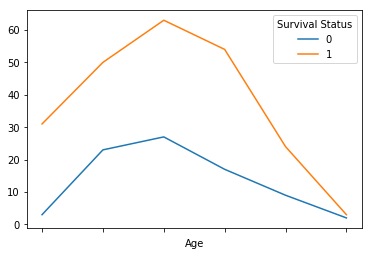

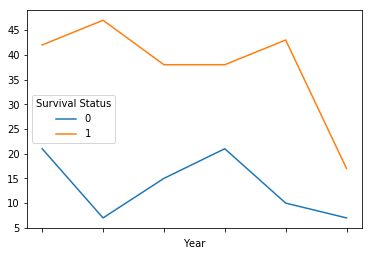

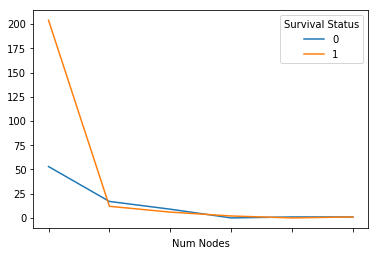

In [16]:
As.plot();
Ys.plot();
Ns.plot();

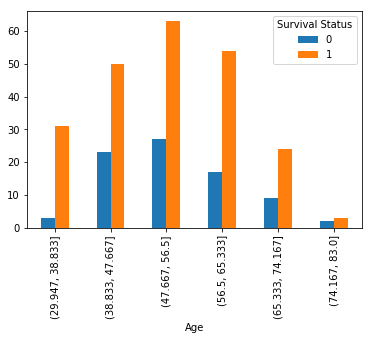

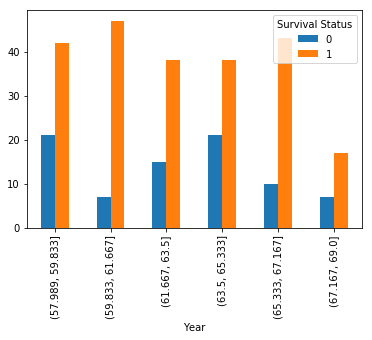

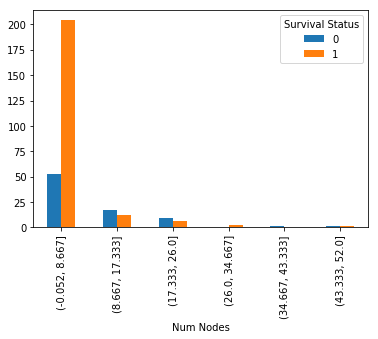

In [17]:
As.plot(kind ='bar');
Ys.plot(kind='bar');
Ns.plot(kind='bar');

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.



*   Age and Num Nodes looks to have a positive relationship with survival.
*   Year looks to have a negative relationship with survival.
*   Age is related to year but Num Nodes doesn't seem related to either. It could be that as you get older, you're more likely to get breast cancer and the more positive nodes, the more likely you are to die. Overall, if you get breast cancer at an older age, the more likely you are to die. 



